In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение S<sub>U</sub> Джонсона (Johnson's S<sub>U</sub>)

Функция плотности вероятности: $f(x, a, b) = \frac{b}{\sqrt{x^2 + 1}}\phi(a + b \log(x + \sqrt{x^2 + 1}))$, для всех $x, a, b > 0$

Сгенерируем выборку объёма 1000 из данного распределения (с $a=3.9$ и $b=2.1$):

In [2]:
a, b = 3.9, 2.10
johnsonsu_rv = sts.johnsonsu(a, b)
sample = johnsonsu_rv.rvs(1000)

Гистограмма выборки и график теоретической плотности распределения:

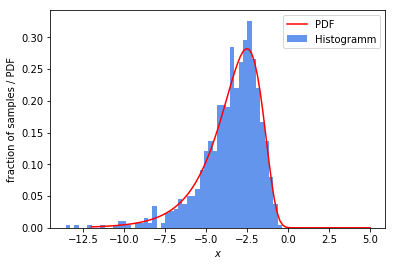

In [3]:
# Рисуем нормированную гистограмму
plt.hist(sample, bins=50, density=True, color='cornflowerblue', label='Histogramm')

# Генерация точек для графика теоретической плотности
x = np.linspace(-12,5,100)
y_pdf = johnsonsu_rv.pdf(x)

# Строим график теоретической плотности распределения
plt.plot(x, y_pdf, color='red', label='PDF')

# Подписи для осей
plt.ylabel('fraction of samples / PDF')
plt.xlabel('$x$')
plt.legend(loc='best')

# Проверка Центральной предельной теоремы

Для проверки ЦПТ будет генерировать выборки размером $n$ из выбранного распределения.<br/>
Для каждого значения $n$ будет делать 1000 выборок.

Мне кажется, что это удобнее делать в одном блоке в цикле. Для реализации этого подхода, определим функцию вычисляющую среднее выборки:

In [4]:
def get_M(sample):
    return float(sum(sample))/len(sample)

Теперь пройдёмся по всем $n$ из кортежа $(5, 10, 30, 100)$ и для каждого сгенерируем 1000 выборок. Результаты сохраним в массив.

In [5]:
# Зададим список значений n
n_values = (5, 10, 30, 100)

# хороший стиль - убрать "магические числа" из кода
num_samples = 1000
num_n = len(n_values)

M = np.zeros((num_n, num_samples), dtype=float)

# i - индекс n из списка значений
# j - номер выборки

for i in range(0, num_n):
    n = n_values[i]
    for j in range(0, num_samples):
        s = johnsonsu_rv.rvs(n)
        M[i, j] = get_M(s)

## Гистограммы распределения выборочных средних

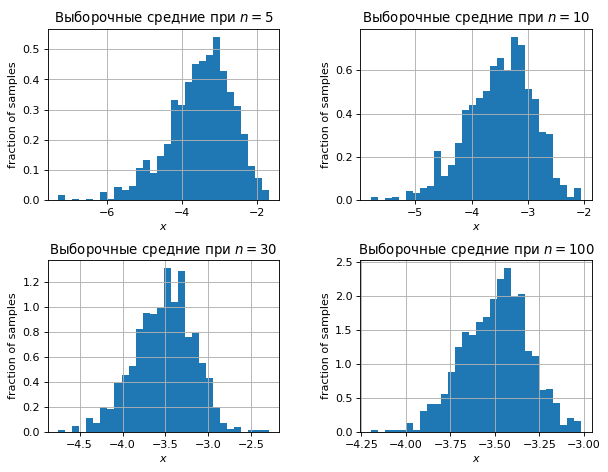

In [6]:
# Определим количество бинов гистограммы
# в отдельной переменной
n_bins = 30

# зададим размер графика
plt.figure(figsize=(8, 6), dpi=80)

# Рисуем гистограммы для всех n
for i in range(0, num_n):
    # следующая строка позволяет рисовать отдельный график внутри одной фигуры
    plt.subplot(221+i)
    plt.hist(M[i,:], bins=n_bins, density=True)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.title("Выборочные средние при $n=%s$" % n_values[i])
    plt.grid(True)
    
# Задаём параметры расположения графиков
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)

## Сравнение распределения выборочных средних с нормальным распределением

Для начала нужно вычислить значения математического ожидания и среднеквадратичного отклонения выбранного распределения.<br/>
К счастью, это можно легко сделать с помощью библиотечных функций для выбранного распределения.

In [7]:
mean = johnsonsu_rv.mean()# = sts.johnsonsu(a, b)
std = johnsonsu_rv.std()

print("Mean = ", mean)
print("Std = ", std)

Mean =  -3.499778159477966
Std =  1.8451174789837828


In [8]:
# Генерация точек для графика теоретической плотности нормального распределения
norm_x = np.linspace(-6,-2,100)

# Так как для каждого n стандартное выборочное отклонение отличается
# создадим 2-мерный массив для значений y
norm_y = np.zeros((num_n, len(norm_x)), dtype=float)
for i in range(0, num_n):
    # std для распределение выборочных средних вычисляется по формуле:
    # sv = std/sqrt(n) ИЛИ как было в этом курсе sv = sqrt(D(X)/n)
    norm_y[i] = sts.norm.pdf(norm_x, loc=mean, scale=std/math.sqrt(n_values[i]))

Наложим теперь на гистограммы распределения средних график теоретического нормального распределения

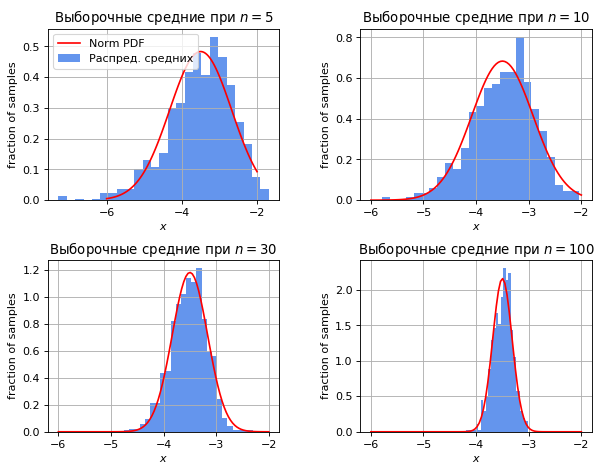

In [9]:
# Определим количество бинов гистограммы
# в отдельной переменной
n_bins = 25

# зададим размер графика
plt.figure(figsize=(8, 6), dpi=80)

# Рисуем гистограммы для всех n
for i in range(0, num_n):
    # следующая строка позволяет рисовать отдельный график внутри одной фигуры
    plt.subplot(221+i)
    # Строим график теоретической плотности нормального распределения
    plt.plot(norm_x, norm_y[i,:], color='red', label='Norm PDF')
    # Гистограмма
    plt.hist(M[i,:], bins=n_bins, density=True, color='cornflowerblue', label='Распред. средних')
    if i == 0: # не не помещается на остальных и мешает
        plt.legend(loc='best')
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.title("Выборочные средние при $n=%s$" % n_values[i])
    plt.grid(True)
    
# Задаём параметры расположения графиков
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)

# Выводы

Как видно из графиков распределения средних, чем больше размер выборки, тем ближе распределение выборочных средних к нормальному распределению. Начиная от $n=30$ несимметричность исходного распределения практически не заметна.